In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## DATA RAPRESENTETION

In [39]:
wine_dataframe = pd.read_csv('winequality_red.csv')
wine_dataframe = wine_dataframe.rename(columns=lambda x: x.replace(" ", "_"))
wine_dataframe.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,NaN,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## DATA RESTORATION

In [40]:
wine_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1557 non-null   float64
 1   volatile_acidity      1560 non-null   float64
 2   citric_acid           1564 non-null   float64
 3   residual_sugar        1553 non-null   float64
 4   chlorides             1570 non-null   float64
 5   free_sulfur_dioxide   1556 non-null   float64
 6   total_sulfur_dioxide  1559 non-null   float64
 7   density               1564 non-null   float64
 8   pH                    1570 non-null   float64
 9   sulphates             1549 non-null   float64
 10  alcohol               1559 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


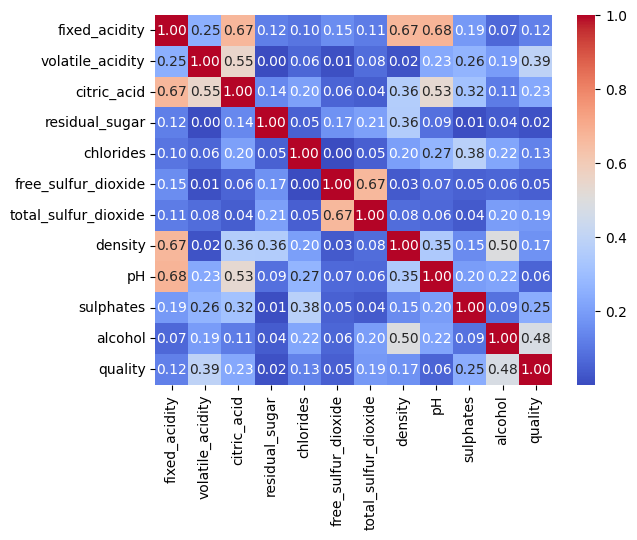

In [41]:
corr_matrix = wine_dataframe.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [42]:
corr_index = np.where((np.triu(corr_matrix, k=1) > 0.20)) # correlated index features

corr_features = pd.DataFrame({
    'Feature1': corr_matrix.columns[corr_index[0]], #Feature1
    'Feature2': corr_matrix.columns[corr_index[1]], #Feature2
    'Correlazione': corr_matrix.values[corr_index]
})

corr_features

,Feature1,Feature2,Correlazione
0,fixed_acidity,volatile_acidity,0.248085
1,fixed_acidity,citric_acid,0.668474
2,fixed_acidity,density,0.668653
3,fixed_acidity,pH,0.678928
4,volatile_acidity,citric_acid,0.549357
5,volatile_acidity,pH,0.231083
6,volatile_acidity,sulphates,0.264631
7,volatile_acidity,quality,0.392406
8,citric_acid,chlorides,0.204613
9,citric_acid,density,0.361542


## Data Restoration Process

The restoration of:
1. **Citric Acid**
2. **Density**
3. **pH**
4. **Sulfurs**
5. **Acidity**
6. **Volatile Acidity**
7. **Alchool**
8. **Density**
9. **Sugar**
10. **Chlorides**
11. **Sulphates**

The data restoration will involve taking the average of the other values within the column. However, not all values in the column will be considered; only those that correlate with another feature will be taken into account. For example, since pH and fixed acidity are correlated, as seen from the heatmap, missing pH values will be restored using the average of pH values within a similar range (within 10%) of fixed acidity.

In [43]:
data_copy=wine_dataframe.copy()
sequence = data_copy.isna().any(axis=1)
data_copy[sequence]


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.280,NaN,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
7,7.3,0.650,NaN,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,NaN,9.2,5
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,NaN,10.5,7
24,6.9,0.400,0.14,2.4,0.085,21.0,40.0,0.99680,NaN,0.63,9.7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,NaN,0.84,11.5,6
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,NaN,3.55,0.66,10.9,6
1588,7.2,0.660,0.33,NaN,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,NaN,5


In [44]:

def restore_function(first_corr_label,second_corr_label,labels_with_nan,delta, dataframe):
    df_miss = dataframe[dataframe[labels_with_nan].isna()]
    for count, value in enumerate(df_miss[first_corr_label]):
        indx=df_miss[first_corr_label].index[count]
        if pd.isna(value):
            if pd.isna(second_corr_label):
               dataframe.loc[indx,labels_with_nan] = round(dataframe[labels_with_nan].mean(skipna=True),2)
            else: 
                new_value=dataframe.loc[indx,second_corr_label]
                correlated=dataframe[
                    (dataframe[second_corr_label] >= new_value*(1-delta)) &
                    (dataframe[second_corr_label] <= new_value*(1+delta))]
                dataframe.loc[indx,labels_with_nan] = round(correlated[labels_with_nan].mean(skipna=True),2)
        else:
            correlated=dataframe[
                (dataframe[first_corr_label] >= value*(1-delta)) &
                (dataframe[first_corr_label] <= value*(1+delta))]
            dataframe.loc[indx,labels_with_nan] = round(correlated[labels_with_nan].mean(skipna=True), 2)
    #print(labels_with_nan,'has been restored with',first_corr_label)
    return dataframe

In [45]:
# Calcola il numero di corrispondenze per ciascuna etichetta
#correspondence_count = []
#for label in labels_with_nan:
   # count = ((corr_features['Feature1'] == label) | (corr_features['Feature2'] == label)).sum()
    #correspondence_count.append(count)

# Crea un DataFrame con le etichette e il numero di corrispondenze
#correspondence_df = pd.DataFrame({'Label': labels_with_nan, 'Correspondence_Count': correspondence_count})

# Ordina miss_label in base al numero di corrispondenze
#labels_with_nan = correspondence_df.sort_values(by='Correspondence_Count', ascending=False)['Label'].tolist()

#correspondence_df

In [46]:
corr_features

,Feature1,Feature2,Correlazione
0,fixed_acidity,volatile_acidity,0.248085
1,fixed_acidity,citric_acid,0.668474
2,fixed_acidity,density,0.668653
3,fixed_acidity,pH,0.678928
4,volatile_acidity,citric_acid,0.549357
5,volatile_acidity,pH,0.231083
6,volatile_acidity,sulphates,0.264631
7,volatile_acidity,quality,0.392406
8,citric_acid,chlorides,0.204613
9,citric_acid,density,0.361542


In [47]:
labels_with_nan = data_copy.columns[data_copy.isna().any()].tolist()
for label in labels_with_nan:
    #Sostituisce le label in Feature2 da confrontare e le mette in Feature1 di relevant row
    relevant_rows = corr_features[(corr_features['Feature1'] == label) | (corr_features['Feature2'] == label)]
    swap_mask = relevant_rows['Feature2'] == label
    relevant_rows.loc[swap_mask, ['Feature1', 'Feature2']] = relevant_rows.loc[swap_mask, ['Feature2', 'Feature1']].values
    relevant_rows = relevant_rows.sort_values(by='Correlazione', ascending=False)
    relevant_rows.reset_index(drop=True, inplace=True)
    #dove non ce una seconda feature ne crea una fittizia di Nan
    try:
        second_corr_label_value = relevant_rows.iloc[1]['Feature2']
    except IndexError:
        second_corr_label_value = np.nan   #add a nan row
        relevant_rows.loc[len(relevant_rows)] = np.nan
        
    restore_function(relevant_rows.iloc[0]['Feature2'],relevant_rows.iloc[1]['Feature2'] ,label,0.05,data_copy)


In [48]:
na_seq=data_copy.isna().any(axis=1)
data_copy[na_seq]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality


In [49]:
data_copy

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5
1,7.80,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.80,5
2,7.80,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.80,5
3,11.20,0.280,0.51,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.80,6
4,7.40,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.20,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.50,5
1595,5.90,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.20,6
1596,6.30,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.00,6
1597,5.90,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.42,5


In [50]:
data_copy.to_csv('restore_winedata.csv', index=False)

wine_dataframe_original=pd.read_csv('archive/winequality-red.csv')
dataframe = wine_dataframe.copy()
sequence=dataframe['citric_acid'].isna()
W1=wine_dataframe_original[sequence]
df_miss = dataframe[sequence]

for delta in np.arange(0,0.51,0.05):
    for count, value in enumerate(df_miss['fixed_acidity']):
        indx=df_miss['fixed_acidity'].index[count]
        if pd.isna(value):
            new_value=dataframe.loc[indx,'pH']
            correlated=dataframe[
                (dataframe['pH'] >= new_value*(1-delta)) &
                (dataframe['pH'] <= new_value*(1+delta))]
            dataframe.loc[indx,'citric_acid'] = round(correlated['citric_acid'].mean(skipna=True),2)
        else:
            correlated=dataframe[
                (dataframe['fixed_acidity'] >= value*(1-delta)) &
                (dataframe['fixed_acidity'] <= value*(1+delta))]
            dataframe.loc[indx,'citric_acid'] = round(correlated['citric_acid'].mean(skipna=True), 2)

